In [214]:
import requests
response = requests.get(
  'http://www.nbastuffer.com/2013-2014_NBA_Regular_Season_Player_Stats.html'
)
content=response.content


In [215]:
from bs4 import BeautifulSoup
parser=BeautifulSoup(content,'html.parser')
parser

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<!-- Place this tag in your head or just before your close body tag -->
<meta content="N/e3k13JvMLMJ+vHNPY3js0dGHaIvVMnPT/MRNppLsE=" name="verify-v1"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>NBAstuffer.com - 2013-2014 NBA Regular Season Player Stats</title>
<meta content="2013-2014 NBA Regular Season Player Stats" name="title"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<meta content="Joomla! - Copyright (C) 2005 - 2007 Open Source Matters. All rights reserved." name="Generator"/>
<meta content="index, follow" name="robots"/>
<script src="http://www.nbastuffer.com/components/com_tag/js/lib/prototype.js" type="text/javascript"></script>
<script src="http://www.nbastuffer.com/components/com_tag/js/src/scriptaculous.js" type="t

In [216]:
body=parser.thead
cols=[]
col_headers_li=body.select('th')
for i in range(len(col_headers_li)):
    cols.append(col_headers_li[i].text)
print(len(cols))
cols=cols[1:]
cols[1]=cols[1][1:]
cols
    

26


['Rank',
 'PLAYER',
 'TEAM',
 'POS',
 'AGE',
 'GP',
 'MPG',
 'MIN%',
 'USG%',
 'TOr',
 'FTA',
 'FT%',
 '2PA',
 '2P%',
 '3PA',
 '3P%',
 'TS%',
 'PPG',
 'RPG',
 'TRB%',
 'APG',
 'AST%',
 'SPG',
 'BPG',
 'VI']

In [217]:
import csv

###Taking out data from tbody to populate columns 
body=parser.tbody
li_of_li=[]
list_players=body.select('tr')
for i in range(len(list_players)):
    li_of_li.append(list_players[i].select('td'))
    for j in range(len(li_of_li[i])):
        li_of_li[i][j]=li_of_li[i][j].text
print(len(li_of_li[0]))   

##write to a csv file and store it
with open('nba.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(cols)
    for i in range(len(li_of_li)):
        spamwriter.writerow(li_of_li[i])


25


In [218]:
import pandas as pd
nba=pd.read_csv('nba.csv')
cols=nba.columns.tolist()[1:]
nba=nba[cols]
nba=nba.dropna()
nba

,PLAYER,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TOr,FTA,...,3P%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,VI
0,Quincy Acy,Tor,SF,23,7,8.5,15.3,14.9,0.102,8,...,0.400,0.542,2.7,2.1,14.7,0.6,10.3,0.57,0.43,7.1
1,Quincy Acy,Sac,SF,23,56,13.9,28.6,9.9,0.160,45,...,0.200,0.518,2.7,3.6,14.5,0.4,4.5,0.34,0.41,4.5
2,Steven Adams,Okc,C,20,81,14.6,30.2,11.8,0.225,136,...,0.000,0.541,3.3,4.1,15.8,0.5,5.1,0.49,0.70,5.2
3,Jeff Adrien,Cha,PF,27,25,10.1,20.3,10.8,0.136,25,...,0.000,0.559,2.3,3.5,19.7,0.3,4.2,0.28,0.60,5.3
4,Jeff Adrien,Mil,PF,27,28,25.0,50.6,19.9,0.101,94,...,0.000,0.552,10.9,7.8,17.9,1.1,7.8,0.61,0.75,7.3
5,Arron Afflalo,Orl,SG,28,73,34.8,71.3,23.4,0.112,336,...,0.427,0.574,18.2,3.6,5.8,3.4,17.0,0.48,0.04,7.0
6,Alexis Ajinca,Nor,C,25,56,16.8,34.5,16.5,0.184,67,...,0.000,0.587,5.9,4.9,17.1,0.7,6.7,0.41,0.82,6.5
7,Cole Aldrich,Nyk,C,25,46,6.9,14.2,13.4,0.195,30,...,0.000,0.620,2.0,2.8,23.7,0.3,6.6,0.17,0.65,6.9
8,LaMarcus Aldridge,Por,PF,28,69,36.0,74.3,29.9,0.072,360,...,0.200,0.507,23.2,11.1,16.6,2.6,13.1,0.93,1.00,9.7
9,Lavoy Allen,Phi,PF,24,51,18.7,38.3,14.4,0.127,40,...,0.154,0.465,5.2,5.4,15.7,1.3,10.4,0.43,0.53,7.1


**2: Point Guards**

Point guards play one of the most crucial roles on a team because their primary responsibility is to create scoring opportunities for the team. We are going to focus our lesson on a machine learning technique called clustering, which allows us to visualize the types of point guards as well as group similar point guards together. Using 2 features allows us to easily visualize the players and will also make it easier to grasp how clustering works. For point guards, it's widely accepted that the Assist to Turnover Ratio is a good indicator for performance in games as it quantifies the number of scoring opportunities that player created. Let's also use Points Per Game, since effective Point Guards not only set up scoring opportunities but also take a lot of the shots themselves.

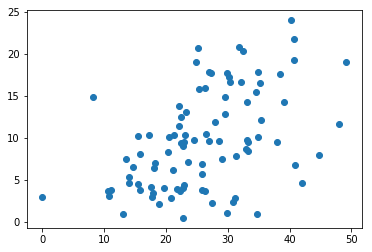

In [228]:
import matplotlib.pyplot as plt
df_pg=nba[nba['POS']=='PG']
%matplotlib inline 
plt.scatter(point_guards['AST%'],df_pg['PPG'])
plt.show()

**6: Clustering Players**
    
There seem to be 5 general regions, or clusters, that the point guards fall into (with a few outliers of course!). We can use a technique called clustering to segment all of the point guards into groups of alike players. While regression and other supervised machine learning techniques work well when we have a clear metric we want to optimize for and lots of pre-labelled data, we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.

There are multiple ways of clustering data but here we will focus on centroid based clustering for this lesson. Centroid based clustering works well when the clusters resemble circles with centers (or centroids). The centroid represent the arithmetic mean of all of the data points in that cluster.

K-Means Clustering is a popular centroid-based clustering algorithm that we will use. The K in K-Means refers to the number of clusters we want to segment our data into. The key part with K-Means (and most unsupervised machine learning techniques) is that we have to specify what k is. There are advantages and disadvantages to this, but one advantage is that we can pick the k that makes the most sense for our use case. We'll set k to 5 since we want K-Means to segment our data into 5 clusters.

/Users/Jaspinder/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


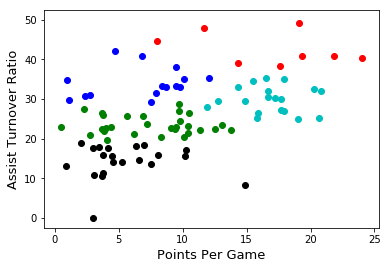

In [242]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=5,random_state=1)
model=k_means.fit(df_pg[['AST%','PPG']])
y_pred = k_means.predict(df_pg[['AST%','PPG']])
df_pg['cluster'] = k_means.labels_
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['PPG'], clustered_df['AST%'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()
visualize_clusters(df_pg, num_clusters)

In [230]:
import numpy as np
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(df_pg.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = df_pg.loc[random_initial_points]
centroids


,PLAYER,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TOr,FTA,...,3P%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,VI
488,C.J. Watson,Ind,PG,29,63,18.7,38.8,16.8,0.136,88,...,0.366,0.554,6.6,1.6,4.8,1.7,14.6,0.95,0.13,5.6
335,Darius Morris,Lac,PG,23,10,5.2,10.6,13.4,0.126,2,...,0.000,0.324,0.9,0.5,5.3,0.5,13.0,0.20,0.00,4.7
487,Casper Ware,Phi,PG,24,9,12.7,24.4,18.5,0.101,6,...,0.333,0.538,5.3,1.0,4.3,1.1,14.1,0.89,0.00,5.7
494,Deron Williams,Bro,PG,29,64,32.0,65.8,21.9,0.150,216,...,0.366,0.564,14.3,2.6,4.9,6.1,33.1,1.45,0.20,7.6
57,Steve Blake,Gol,PG,33,28,21.5,43.8,11.3,0.201,8,...,0.342,0.494,4.4,2.0,5.1,3.6,22.9,0.71,0.21,5.9


**8: Visualize Centroids**

Let's plot the centroids, in addition to the point_guards, so we can see where the randomly chosen centroids started out.

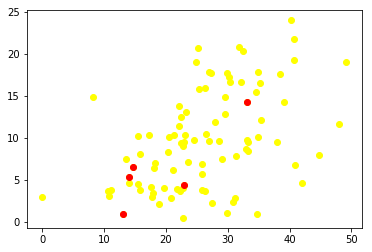

In [237]:
fig,ax=plt.subplots()
ax.scatter(df_pg['AST%'],df_pg['PPG'],color='yellow')
ax.scatter(centroids['AST%'],centroids['PPG'],color='red')
plt.show()